In [7]:
#Assesment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

leaddata = pd.read_csv('PS_Homework_data_set.csv')
leaddata=leaddata.rename({'Unnamed: 0': 'Number_of_Leads'}, axis=1) 
leaddata.head()

,Number_of_Leads,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue
0,0,485,1,00:00.0,12:37.9,NaN,7/14/2006,3855,138,NaN
1,1,598,1,00:00.0,12:37.9,NaN,8/2/2006,3836,138,NaN
2,2,673,1,00:00.0,36:30.0,NaN,8/17/2006,3821,86,NaN
3,3,813,1,00:00.0,12:37.9,NaN,9/12/2006,3795,138,NaN
4,4,1132,1,00:00.0,12:37.9,NaN,11/2/2006,3744,138,NaN


[](https://)# Questions:

In [8]:
# Question 1: How many leads are represented in this dataset? 
print("Number of leads in the dataset:", len(leaddata))

#Describe both the assigned and unassigned populations. 
leaddata['assigned'].describe()

Number of leads in the dataset: 77891


count    77891.000000
mean         0.476037
std          0.499429
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: assigned, dtype: float64

Text(0.5, 1.02, 'Leads Assigned and Unnasigned')

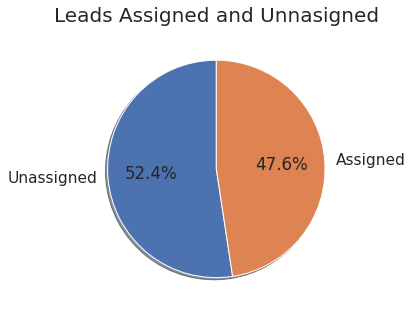

In [9]:
#Leads Assigned and Unassigned pie charts.
import pandas as pd
import matplotlib.pyplot as plt

leaddata = pd.read_csv('PS_Homework_data_set.csv')
leaddata['assigned'].replace({0:"Unassigned", 1:"Assigned"},inplace = True)
leaddatagroup=leaddata['assigned'].value_counts()
leaddatagroup.plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(10,5), autopct='%1.1f%%')
plt.ylabel('')
plt.title("Leads Assigned and Unnasigned", y=1.02, fontsize=20)


In [10]:
#Count of Assigned and Unassigned Populations in the dataset
leaddata['assigned'].replace({0:"Unassigned", 1:"Assigned"},inplace = True)
leaddata['assigned'].value_counts()

Unassigned    40812
Assigned      37079
Name: assigned, dtype: int64

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import pandas as pd
import seaborn as sns
import numpy as np
% matplotlib inline
sns.set(font_scale=1.4)
#Code for units
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

Average Revenue of each group:
      assigned       revenue
0    Assigned  7.673686e+07
1  Unassigned  2.388942e+07


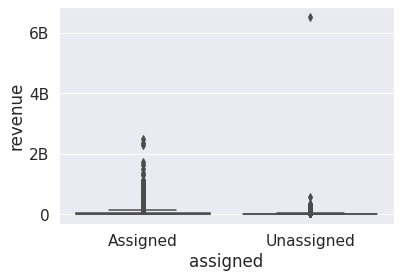

In [12]:
#What is the average revenue of each group?
import seaborn as sns
print('Average Revenue of each group:\n', leaddata.groupby('assigned', as_index=False)['revenue'].mean())
sns.boxplot(x=leaddata['assigned'],y=leaddata['revenue'])
#To plot the graph with M of Millions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

#-Average Revenue when a lead is Assigned to a sales team is USD 76,736,860 = USD 76.73 M
#-Average Revenue when a lead is not Assigned to a sales team is USD 23,889,420 = USD 23.8M

In [13]:
#Data Cleaning for Assigned and Revenue metrics.
#Droping missing values NaA in revenue.
#There are outliers we should remove
#Interquartile range method
#find Q1, Q3, and interquartile range for each column

import pandas as pd
import scipy.stats as stats

subsetlead=leaddata[['assigned', 'revenue' ]]
#Droping missing values NaA in revenue.
subsetlead.dropna(subset=['revenue'])

sorted(subsetlead)
##Removing Outliers with Interquartile range method
Q1 = subsetlead['revenue'].quantile(0.25)
Q3 = subsetlead['revenue'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (subsetlead['revenue'] >= Q1 - 1.5 * IQR) & (subsetlead['revenue'] <= Q3 + 1.5 *IQR)
subsetlead=subsetlead.loc[filter]  




Average Revenue of each group:
      assigned       revenue
0    Assigned  2.185019e+07
1  Unassigned  1.684789e+07


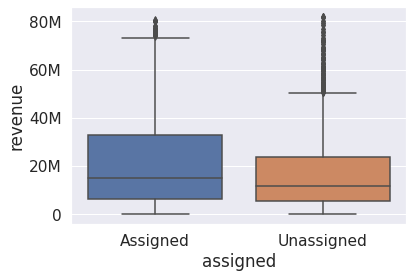

In [14]:
#What is the average revenue of each group?Once we remove the outliers and drop missing values in revenue column.We got a better 
#explanation of the whisker plots and more realistic values.
import seaborn as sns
#subsetlead dataframe is our subset (data cleaning)
print('Average Revenue of each group:\n', subsetlead.groupby('assigned', as_index=False)['revenue'].mean())
sns.boxplot(x=subsetlead['assigned'],y=subsetlead['revenue'])
#To plot the graph with M of Millions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
#-Average Revenue when a lead is Assigned to a sales team is USD 21,850,190  = USD 21.8M
#-Average Revenue when a lead is not Assigned to a sales team is USD 16,847,890 = USD 16.8M

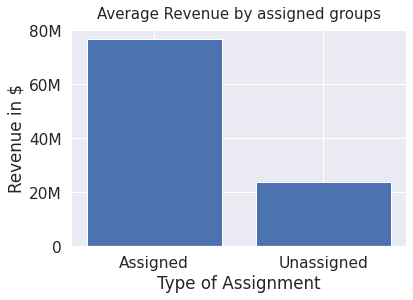

In [15]:
#Plotting the average revenue based on assignment with original dataset
#Count of Assigned and Unassigned Populations in the dataset
leaddata['assigned'].replace({0: "Assigned", 1: "Unassigned"},inplace = True)
leaddata['assigned'].value_counts()
#What is the average revenue of each group?
leaddata2=leaddata.groupby('assigned', as_index=False)['revenue'].mean()
#Plot Avg Revenue per unassigned and assigned groups
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
% matplotlib inline
plt.bar(leaddata2.assigned.unique(),leaddata2.revenue.unique());
plt.xlabel('Type of Assignment')
plt.ylabel('Revenue in $')
plt.title("Average Revenue by assigned groups", y=1.02, fontsize=15)
#To plot the graph with M of Millions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
#plt.show()
#Graph whitout dropping the missing values in revenue

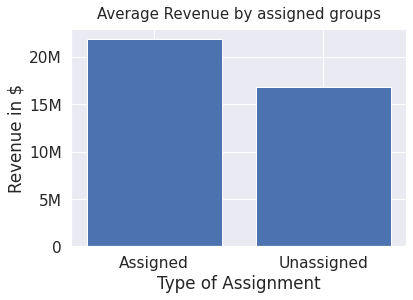

In [16]:
#Plotting the average revenue based on assignment once we eliminate outliers and drop missing values in revenue variable.

#What is the average revenue of each group?
#Plot Avg Revenue per unassigned and assigned groups
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
% matplotlib inline

#What is the average revenue of each group?
subsetlead2=subsetlead.groupby('assigned', as_index=False)['revenue'].mean()

plt.bar(subsetlead2.assigned.unique(),subsetlead2.revenue.unique());
plt.xlabel('Type of Assignment')
plt.ylabel('Revenue in $')
plt.title("Average Revenue by assigned groups", y=1.02, fontsize=15)
#To plot the graph with M of Millions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

#After deleting outliers and droping missing values from revenue variable

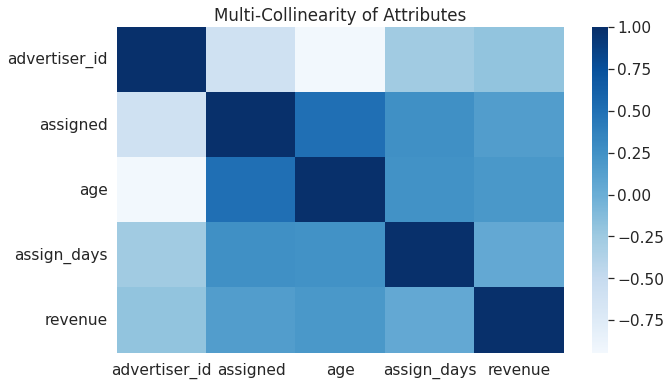

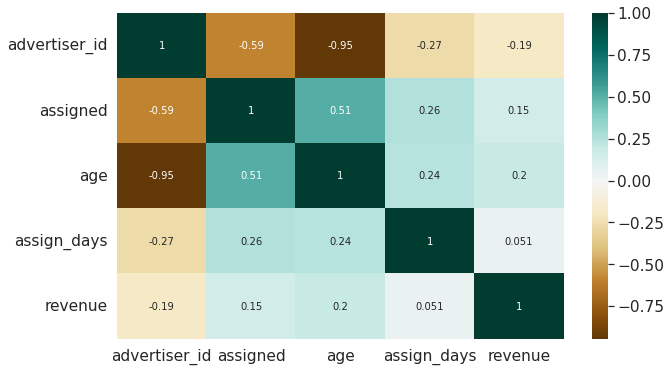

In [17]:
# Question 2: What are the most important metrics to consider when answering the problem statement? Why?
# The most important metrics to consider are revenue, assigned, age and assign_days
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Creating subset denominated leaddatacor for just those variables I would like to analize.
leaddata = pd.read_csv('PS_Homework_data_set.csv')
leaddatacor=leaddata.dropna(subset=['advertiser_id','date_assignment_ends','first_revenue_date','date_created','age','assign_days','revenue'])
leaddatacor=leaddatacor[['advertiser_id','assigned','first_revenue_date','date_created','age','assign_days','revenue' ]]

#leaddatacor.head(1000)
from datetime import datetime
leaddatacor['first_revenue_date'] = pd.to_datetime(leaddatacor['first_revenue_date'])
leaddatacor['date_created'] = pd.to_datetime(leaddatacor['date_created'])
leaddatacor.dtypes
leaddatacor=leaddatacor[['advertiser_id','assigned','age','assign_days','revenue' ]]
fig, ax = plt.subplots(figsize=(10,6))

#Plot Heatmap with Blues cmap
sns.heatmap(leaddatacor.corr(), center=0, cmap='Blues')
ax.set_title('Multi-Collinearity of Attributes')

#Plot Heatmap with BrBG cmap, for a better visualization.
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(leaddatacor.corr(), center=0, cmap='BrBG', annot=True)

#So ,The most important metrics to consider  are:
#1.assigned
#2.age 
#3.Aassign days
#4.Revenue

In [18]:
# Question 3: Analyze any existing relationship between account age and revenue.

#Finding the corelation between the age and revenue attributes
df1 = leaddata[['age','revenue']]
df1.dropna(subset = ['revenue'])
df1.corr(method = 'pearson')

#We observe a slight positive corelation between the age and revenue from a lead
#that means, that as age increases, the revenue has also increased.

#However the corelation between age and revenue is 0.198 ~ 0.20 which is a weak corelation.
#The straight-line model through the data explains R²=0.1989 ~=19.89% ~= 20% of the variance of the data.
#The correlation is positive, which means that as the dependent variable is increase, the independent variable increase too.

#Summmary:
#This indicates that by the given linear model, 20% of the variability of Y(revenue) or dependent variable,
#Can be explained by the X(age) or independent variable. That means, that our fitted simple linear model is bad. 
#Because there is a few linear dependency between them. So, the linear fitting should be rejected.

,age,revenue
age,1.000000,0.198913
revenue,0.198913,1.000000


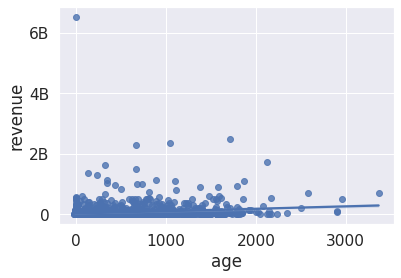

In [19]:
#Ploting Scaterplot to find corelation between account age and revenue 
import seaborn as sns
sns.regplot(x=leaddata['age'],y=leaddata['revenue'])
#To plot the graph with M of Millions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

In [20]:
#Data Cleaning for Age and Revenue metrics.
#Droping missing values NaA in revenue.
#There are outliers we should remove
#Method: Interquartile range method
#Find Q1, Q3, and interquartile range for each column
import pandas as pd
import scipy.stats as stats

subsetlead2=leaddata[['age', 'revenue' ]]
#Droping missing values NaA in revenue.
subsetlead2.dropna(subset=['revenue'])
sorted(subsetlead2)
##Removing Outliers with Interquartile range method
Q1 = subsetlead2['revenue'].quantile(0.25)
Q3 = subsetlead2['revenue'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
filter = (subsetlead2['revenue'] >= Q1 - 1.5 * IQR) & (subsetlead2['revenue'] <= Q3 + 1.5 *IQR)
subsetlead2=subsetlead2.loc[filter]  

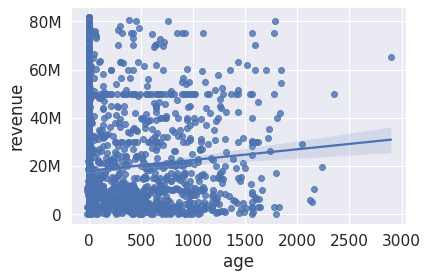

In [21]:
#Ploting Scaterplot to find corelation between account age and revenue ,after data cleaning.
import seaborn as sns
sns.regplot(x=subsetlead2['age'],y=subsetlead2['revenue'])
#To plot the graph with M of Millions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

In [22]:
#Finding the corelation between the age and revenue attributes,after data cleaning.
df1 = subsetlead2[['age','revenue']]
df1.corr(method = 'pearson')

,age,revenue
age,1.00000,0.09808
revenue,0.09808,1.00000


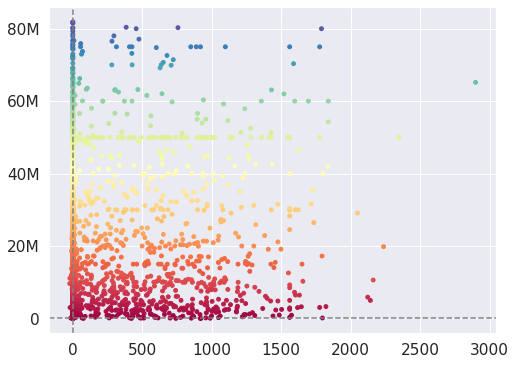

In [23]:
#Question 3:Analyze any existing relationship between account age and revenue using a Scatterplot and Colormap,after data cleaning.
from matplotlib import rcParams
rcParams['figure.figsize']=8,6
plt.axvline(0,c=(.5,.5,.5),ls='--')
plt.axhline(0,c=(.5,.5,.5),ls='--')
plt.scatter(subsetlead2.age,subsetlead2.revenue,c=subsetlead2.revenue ,cmap='Spectral',s=15);
#To plot the graph with M of Millions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

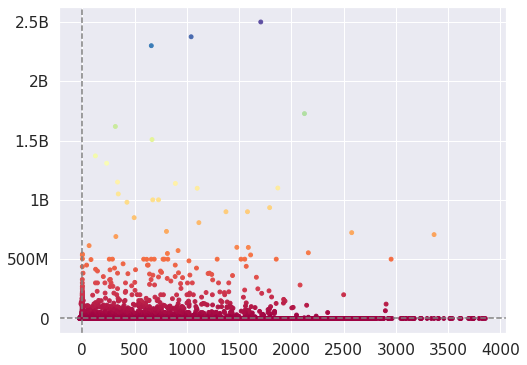

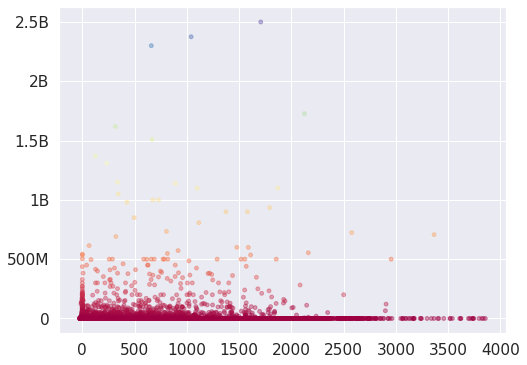

In [24]:
#Question 3:Analyze any existing relationship between account age and revenue.While ,updating missing values Na to 0 for cumsum purposes
leaddata3 = pd.read_csv('PS_Homework_data_set.csv')
#Updating missing values Na to 0 for cumsum purposes
leaddata3['revenue'] = leaddata3['revenue'].fillna(0)
#Choosing just assigned values = 1 or greater than 0
leaddata3=leaddata3[leaddata3["assigned"] > 0]
#Scatterplot and Colormap
from matplotlib import rcParams
rcParams['figure.figsize']=8,6
plt.axvline(0,c=(.5,.5,.5),ls='--')
plt.axhline(0,c=(.5,.5,.5),ls='--')
#Plot without high transparency,but better color distinguish.
plt.scatter(leaddata3.age,leaddata3.revenue,c=leaddata3.revenue ,cmap='Spectral',s=15);
#To plot the graph with M of Millions and B of Billions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()
##Plot with high transparency,but not better color distinguish.
plt.scatter(leaddata3.age,leaddata3.revenue,c=leaddata3.revenue ,cmap='Spectral',s=15, alpha=.4)
#To plot the graph with M of Millions and B of Billions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()

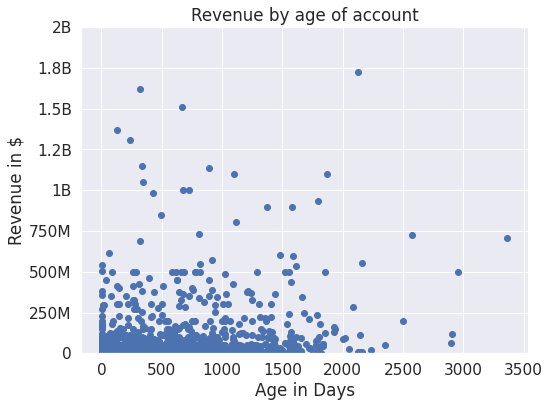

In [25]:
#Question3
#Scaterplot revenue and age metric.Just taking values with at least a value for revenue .Without taking out outliers.
leaddata4 = pd.read_csv('PS_Homework_data_set.csv')
#Choosing just revenue greater than 0
leaddata4=leaddata4[leaddata4["revenue"] > 0]
#Choosing just age greater than 0
leaddata4=leaddata4[leaddata4["age"] > 0]
plt.scatter(leaddata4['age'],leaddata4['revenue']);
plt.ylim([0, 2000000000])
plt.title('Revenue by age of account')
plt.xlabel('Age in Days')
plt.ylabel('Revenue in $')
#To plot the graph with M of Millions and B of Billions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()
#Shows the dispersion of the data using dimensional data set 
#A scatter plot displays the relationship between age account and revenue(numeric variables). Each data point is represented as a circle. 
#And shows whether data groups or is dispersed.Whereas, if the points are randomly distributed with no obvious pattern.It could possibly indicate a lack of dependent relationship.

In [26]:
#Finding the corelation between the age and revenue attributes.Just taking out values with at least a value for revenue .Without taking outliers.
df1 = leaddata4[['age','revenue']]
df1.corr(method = 'pearson')

,age,revenue
age,1.00000,0.17249
revenue,0.17249,1.00000


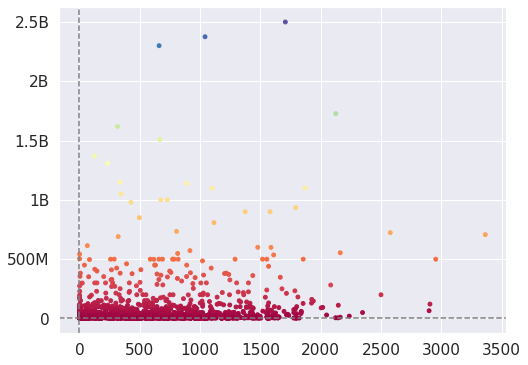

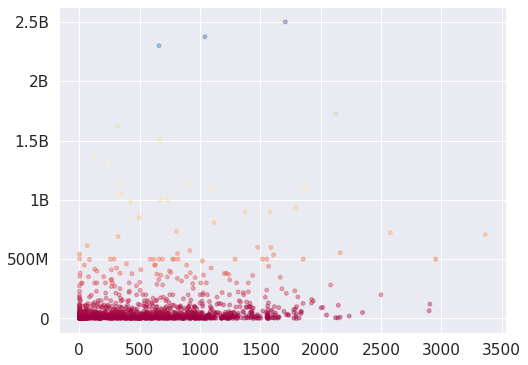

In [27]:
#Analyzing any existing relationship between account age and revenue.Just taking values with at least a value for revenue .Without taking out outliers.
#Scatterplot and Colormap
from matplotlib import rcParams
rcParams['figure.figsize']=8,6
plt.axvline(0,c=(.5,.5,.5),ls='--')
plt.axhline(0,c=(.5,.5,.5),ls='--')
#Plot without high transparency,but better color distinguish.
plt.scatter(leaddata4.age,leaddata4.revenue,c=leaddata4.revenue ,cmap='Spectral',s=15);
#To plot the graph with M of Millions and B of Billions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()
##Plot with high transparency,but not better color distinguish.
plt.scatter(leaddata4.age,leaddata4.revenue,c=leaddata4.revenue ,cmap='Spectral',s=15, alpha=.4)
#To plot the graph with M of Millions and B of Billions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()

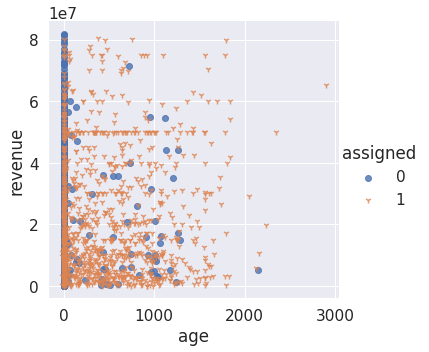

In [28]:
#Analyzing any existing relationship between account age and revenue.Removing Outliers with Interquartile range method
import pandas as pd
import scipy.stats as stats
subsetlead3=leaddata[['age', 'assigned','revenue']]
#Droping missing values NaA in revenue.
subsetlead3.dropna(subset=['revenue'])

sorted(subsetlead3)
##Removing Outliers with Interquartile range method
Q1 = subsetlead3['revenue'].quantile(0.25)
Q3 = subsetlead3['revenue'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (subsetlead3['revenue'] >= Q1 - 1.5 * IQR) & (subsetlead3['revenue'] <= Q3 + 1.5 *IQR)
subsetlead3=subsetlead3.loc[filter] 

#Plot accross diferent assigned values
sns.lmplot(x='age',y='revenue',data=subsetlead3,fit_reg=False,
           hue='assigned',legend=True,markers=['o','1'])

In [29]:
#Finding the corelation between the age and revenue attributes.Removing Outliers with Interquartile range method
df1 = subsetlead3[['age','revenue']]
df1.corr(method = 'pearson')

,age,revenue
age,1.00000,0.09808
revenue,0.09808,1.00000


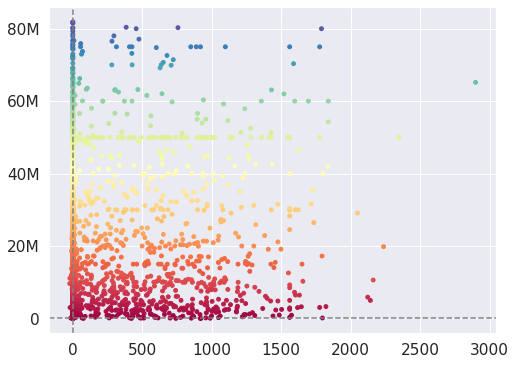

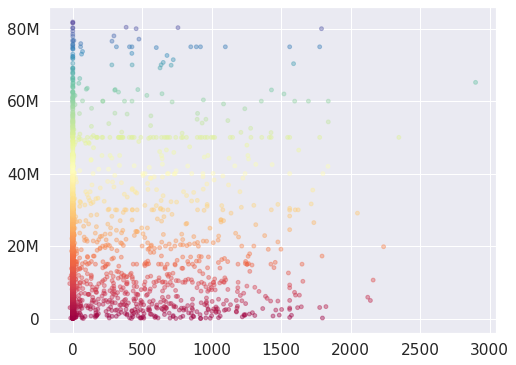

In [30]:
#Analyzing any existing relationship between account age and revenue.Just taking values with at least a value for revenue.Removing Outliers with Interquartile range method
from matplotlib import rcParams
rcParams['figure.figsize']=8,6
plt.axvline(0,c=(.5,.5,.5),ls='--')
plt.axhline(0,c=(.5,.5,.5),ls='--')
#Plot without high transparency,but better color distinguish.
plt.scatter(subsetlead3.age,subsetlead3.revenue,c=subsetlead3.revenue ,cmap='Spectral',s=15);
#To plot the graph with M of Millions and B of Billions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()

##Plot with high transparency,but not better color distinguish.
plt.scatter(subsetlead3.age,subsetlead3.revenue,c=subsetlead3.revenue ,cmap='Spectral',s=15, alpha=.4)
#To plot the graph with M of Millions and B of Billions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()

In [31]:
import matplotlib.pyplot as plt 
subsetlead3.describe()

,age,assigned,revenue
count,2982.000000,2982.000000,2.982000e+03
mean,187.517773,0.419182,1.894476e+07
std,384.859936,0.493508,1.740586e+07
min,-22.000000,0.000000,1.200000e+04
25%,0.000000,0.000000,5.706000e+06
50%,0.000000,0.000000,1.334794e+07
75%,142.750000,1.000000,2.785775e+07
max,2899.000000,1.000000,8.185600e+07


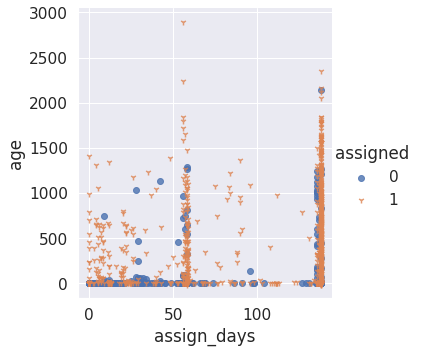

In [32]:
#Question 4 and Question 3.Mix Question:
#Analyze any existing relationship between account age and revenue.
#What is the incremental value of assigning a lead to the sales team?
import pandas as pd
import scipy.stats as stats
subsetlead4=leaddata[['age', 'revenue','assign_days','assigned']]

#Droping missing values NaA in revenue.
subsetlead4.dropna(subset=['revenue'])

sorted(subsetlead4)
##Removing Outliers with Interquartile range method
Q1 = subsetlead4['revenue'].quantile(0.25)
Q3 = subsetlead4['revenue'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
filter = (subsetlead4['revenue'] >= Q1 - 1.5 * IQR) & (subsetlead4['revenue'] <= Q3 + 1.5 *IQR)
subsetlead4=subsetlead4.loc[filter] 

#Plot accross diferent assigned values
sns.lmplot(x='assign_days',y='age',data=subsetlead4,fit_reg=False,
           hue='assigned',legend=True,markers=['o','1'])

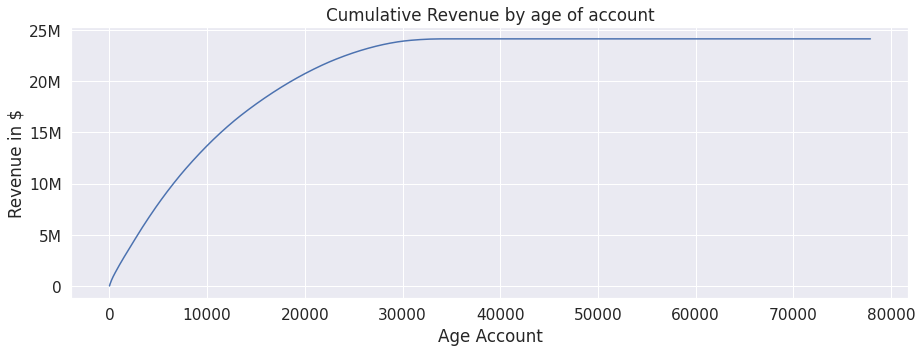

In [33]:
#Question:3
#Analyze any existing relationship between account age and revenue.Cumulative Revenue
#Plotting the cumulative revenue by age of account[Without filling missing values with 0]
leaddata = pd.read_csv('PS_Homework_data_set.csv')
a = np.array([leaddata['age'],leaddata['revenue']])
x = np.cumsum(a)
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(x)
plt.title('Cumulative Revenue by age of account')
plt.xlabel('Age Account')
plt.ylabel('Revenue in $')

#To plot the graph with M of Millions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()
#leaddata
#Cumulative data revenue is information gathered over the age of the account. 
#Cumulative data is a graph showing how company's revenue has increased since the beginning of an openning account.

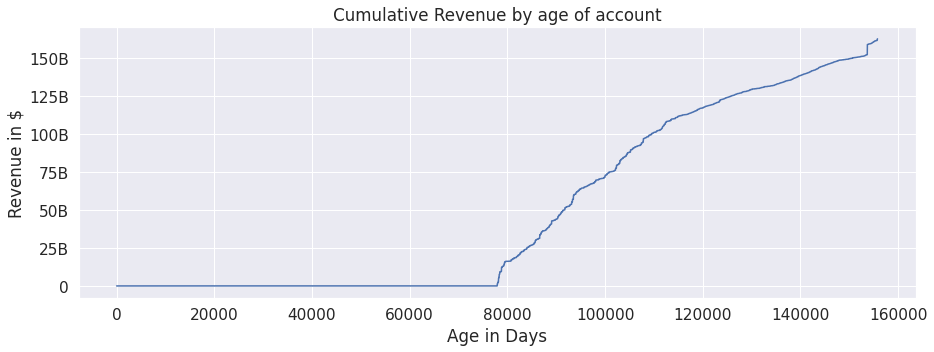

In [34]:
#Question:3
#Plotting the cumulative revenue by age of account .Once ,updating missing values Na to 0 for cumsum purposes.
#Updating missing values Na to 0 for cumsum purposes
leaddatacum2 = pd.read_csv('PS_Homework_data_set.csv')
leaddatacum2['revenue'] = leaddatacum2['revenue'].fillna(0)
#Cumulative Sum
b = np.array([leaddatacum2['age'],leaddatacum2['revenue']])
z = np.cumsum(b)
leaddatacum2['cumulative_Revenue']=leaddatacum2['revenue'].cumsum(axis = 0)
#Plot
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(z)
plt.title('Cumulative Revenue by age of account')
plt.xlabel('Age in Days')
plt.ylabel('Revenue in $')
#To plot the graph with M of Millions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#leaddata.head(300)
#Cumulative data revenue is information gathered over the age of the account. 
#Cumulative data is a graph showing how company's revenue has increased since the beginning of an openning account.
#More than 50% of the leads data result in 0 revenue.Because there are 77891 rows of leads , from where just 3340 leads have revenues.
#which proportion is 0.042 or 4.2% leads from total have revenue .
#In R language , the graph counts the cumulative revenue from last lead data to first lead data so the graph have a log shape ,however using python
#the cumulation sum revenue is from first lead data to the last lead data .

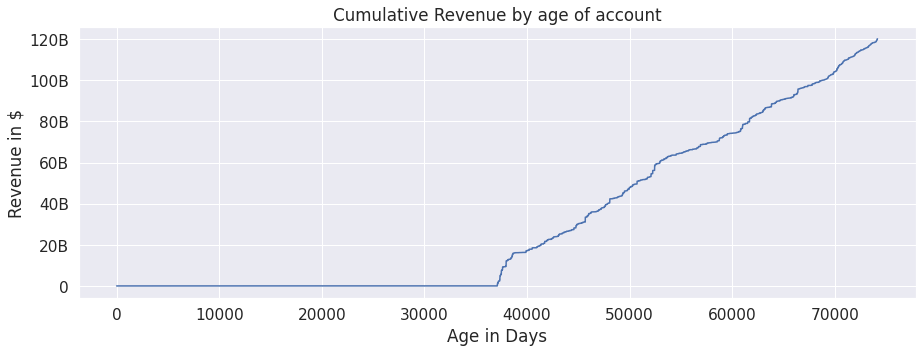

In [35]:
#Question:3
#Plotting the cumulative revenue by age of account.Choosing just assigned values = 1 or greater than 0.
leaddatacum3 = pd.read_csv('PS_Homework_data_set.csv')
#Updating missing values Na to 0 for cumsum purposes
leaddatacum3['revenue'] = leaddatacum3['revenue'].fillna(0)
#Choosing just assigned values = 1 or greater than 0
leaddatacum3=leaddatacum3[leaddatacum3["assigned"] > 0]
#Sort Values 
#leaddata3.sort_values(by="revenue",ascending=False)
b = np.array([leaddatacum3['age'],leaddatacum3['revenue']])
z = np.cumsum(b)
#To ad a column of cum sum in the data set
leaddatacum3['cumulative_Revenue']=leaddatacum3['revenue'].cumsum(axis = 0)
#Plotting
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(z)
plt.title('Cumulative Revenue by age of account')
plt.xlabel('Age in Days')
plt.ylabel('Revenue in $')
#To plot the graph with M of Millions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()
pd.set_option("display.max_rows", None, "display.max_columns", None)

#leaddata3.head(50)
#To See the data in csv
#leaddata3.to_csv(r'C:\Users\ANA GABRIELA\OneDrive\Documentos\03 Trabajo\Indeed\PS_Homework_data_set3.csv', index = False)
#We can observe that a through the time, the probability that a sales
#Representative gets revenue for the business is better after a period of time of approximate
#37000  days than the begining of the accoung age , assuming that the account age is in days.
#After that period of time, the cumulative revenue for the company increases constantly ,which migh be true because more customers are more engaged with
# their products or services (premium membership after a certain period of time.

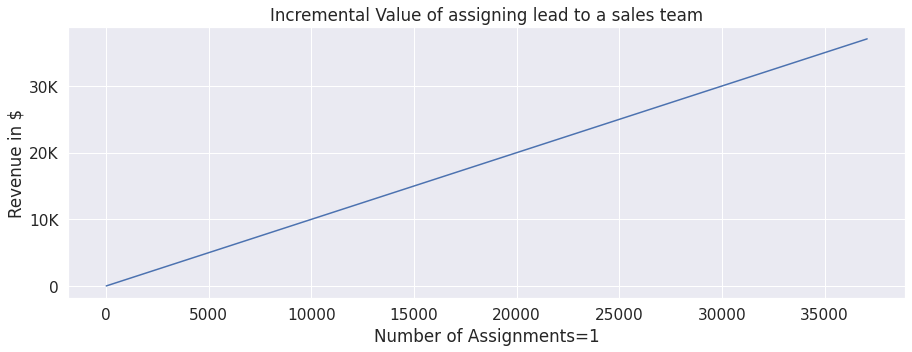

In [36]:
#Question 4: What is the incremental value of assigning a lead to the sales team?Choosing just assigned values = 1 (greater than 0)
leaddata5 = pd.read_csv('PS_Homework_data_set.csv')
#Choosing just assigned values = 1 (greater than 0)
leaddata5=leaddata5[leaddata5["assigned"] > 0]
#Formulating the Cumulative Sum 
a = np.array([leaddata5['assigned'],leaddata5['revenue']])
x = np.cumsum(a)
#To ad a column of cum sum in the data set
leaddata5['cumulative_Revenue']=leaddata5['revenue'].cumsum(axis = 0)
plt.plot(x)
plt.rcParams["figure.figsize"] = (15,5)
plt.title('Incremental Value of assigning lead to a sales team')
plt.xlabel('Number of Assignments=1')
plt.ylabel('Revenue in $')
#To plot the graph with M of Millions and B of Billions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()
#leaddata5.describe()
#In the plot below, we observe that the revenue kept increasing as we kept assigning more leads to the sales team, assigned=1.The slope is positive.

In [37]:
#Finding the equation for incremental value of assignning lead to a sales team.
xvar=np.cumsum(leaddata5['assigned'])
yvar=np.cumsum(leaddata5['revenue'])
#Find coeficients
def slope_intercept(xvar,yvar):
  x=xvar
  y=yvar
  m=(((np.mean(x)*np.mean(y))-np.mean(x*y))/
    ((np.mean(x)*np.mean(x))-np.mean(x*x)))
  m=round(m,2)
  b=(np.mean(y)-np.mean(x)*m)
  b=round(b,2)
  return m,b
slope_intercept(xvar,yvar)

#Choosing just assigned values = 1 (greater than 0) (leadata5)
#y=m*x+b
#cumsumrevenue=5860896.92*numberofassigned+[-33713709357.11]

(5860896.92, -33713709357.11)

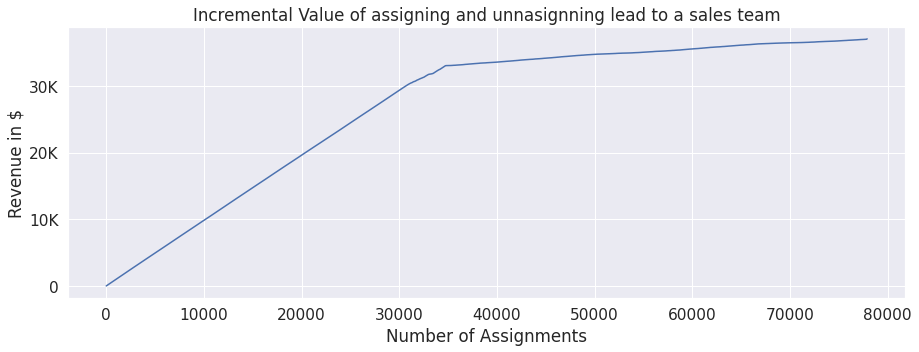

In [38]:
#Question 4: What is the incremental value of assigning a lead to the sales team?Using assigned and unnasigned vales just for comparison purposes.
leaddata6 = pd.read_csv('PS_Homework_data_set.csv')
a = np.array([leaddata6['assigned'],leaddata6['revenue']])
x = np.cumsum(a)
plt.plot(x)
plt.title('Incremental Value of assigning and unnasignning lead to a sales team')
plt.xlabel('Number of Assignments')
plt.ylabel('Revenue in $')
#To plot the graph with M of Millions and B of Billions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

plt.show()
#leaddata6.head(10)
#To See the data in csv
#leaddata.to_csv(r'C:\Users\ANA GABRIELA\OneDrive\Documentos\03 Trabajo\Indeed\PS_Homework_data_setV.csv', index = False)
#In the plot below, we observe that the revenue kept increasing as we kept assigning more leads to the sales team. 
#The increment became less steaper once the mark corssed around 35,000 assignments around.
##So the observation becomes that the revenue increased more when the sales team was assigned and was flatter when the lead as was not assigned (=0) to the sales team

In [39]:
#Finding the equation for incremental value of assignning lead to a sales team.
xvar=np.cumsum(leaddata6['assigned'])
yvar=np.cumsum(leaddata6['revenue'])
#Find coeficients
def slope_intercept(xvar,yvar):
  x=xvar
  y=yvar
  m=(((np.mean(x)*np.mean(y))-np.mean(x*y))/
    ((np.mean(x)*np.mean(x))-np.mean(x*x)))
  m=round(m,2)
  b=(np.mean(y)-np.mean(x)*m)
  b=round(b,2)
  return m,b
slope_intercept(xvar,yvar)

#Equation without replacing the revenue missing values NaN with 0 neither choosing assigned > 0 , in dataset(leaddata6)
#y=m*x+b  
#cumsumrevenue=4750775.29*cumsumassigned+[-21558251072.25]

(4750775.29, -21558251072.25)

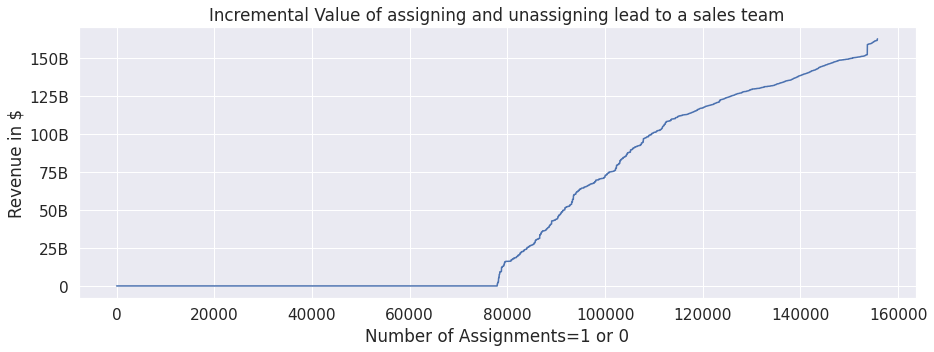

In [40]:
#Question 4: What is the incremental value of assigning a lead to the sales team?Updating missing values Na with 0 for cumsum purposes
#And considering assigned and unnasigned vales just for comparison purposes.
leaddata7 = pd.read_csv('PS_Homework_data_set.csv')
#Updating missing values Na to 0 for cumsum purposes
leaddata7['revenue'] = leaddata7['revenue'].fillna(0)
a = np.array([leaddata7['assigned'],leaddata7['revenue']])
x = np.cumsum(a)
#To ad a column of cum sum in the data set
leaddata7['cumulative_Revenue']=leaddata7['revenue'].cumsum(axis = 0)
plt.plot(x)
plt.rcParams["figure.figsize"] = (15,5)
plt.title('Incremental Value of assigning and unassigning lead to a sales team')
plt.xlabel('Number of Assignments=1 or 0')
plt.ylabel('Revenue in $')
#To plot the graph with M of Millions and B of Billions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()
#leaddata7.describe()
#leaddata7.head(10)

In [41]:
#Finding the equation for incremental value of assignning lead to a sales team.
#Updating missing values Na with 0 for cumsum purposes
#And considering assigned and unnasigned vales just for comparison purposes.
xvar=np.cumsum(leaddata7['assigned'])
yvar=np.cumsum(leaddata7['revenue'])
#Find coeficients
def slope_intercept(xvar,yvar):
  x=xvar
  y=yvar
  m=(((np.mean(x)*np.mean(y))-np.mean(x*y))/
    ((np.mean(x)*np.mean(x))-np.mean(x*x)))
  m=round(m,2)
  b=(np.mean(y)-np.mean(x)*m)
  b=round(b,2)
  return m,b
slope_intercept(xvar,yvar)

#Equation , after replacing the revenue  missing values NaN with 0, in dataset(leaddata7)
#y=m*x+b
#cumsumrevenue=3736229.37*cumsumassigned+[-1133770726.17]

(3736229.37, -1133770726.17)

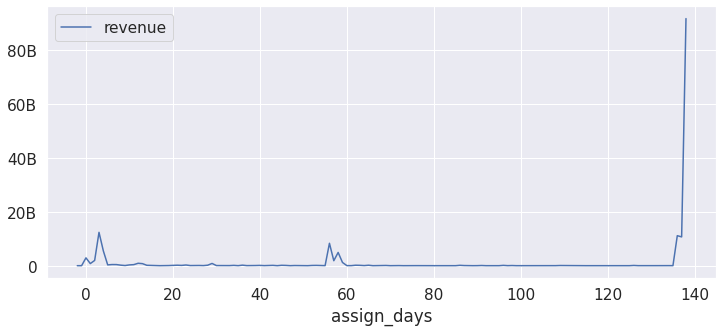

In [42]:
#Question 5 (Bonus Question)
#Plotting the effect of the number of days assigned to the revenue generated by the sales representative.
df2 = leaddata[['assign_days', 'revenue']]
df3 = df2.groupby('assign_days').sum()
df3.plot(figsize = (12,5));

#To plot the graph with M of Millions and B of Billions in y axis.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()

#From the visualization below, we observe that the revenue is comparitively higher during two main periods: 
#Between 1-7 days and 55-60 days approximately.
# The vertical growth for 135-140 days could be due to outliers in the dataset 

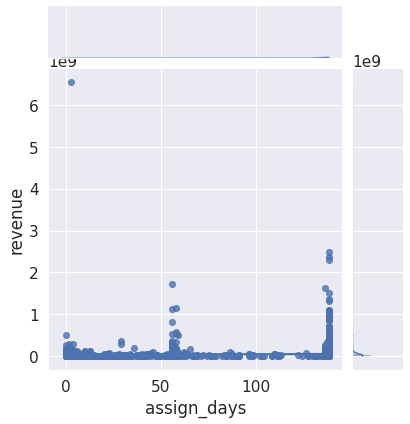

In [43]:
#Ploting a jointplot using reg
sns.jointplot(x=df2['assign_days'],y=df2['revenue'],kind='reg')

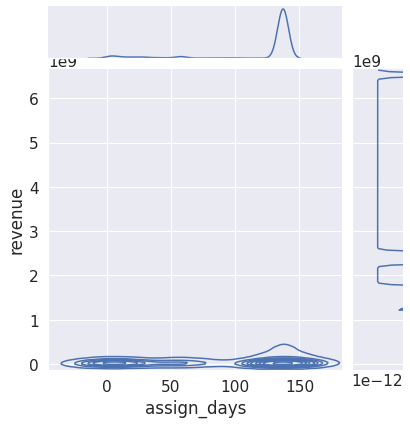

In [44]:
#Ploting jointplot using kde
sns.jointplot(data=df2,x='assign_days',y='revenue',kind='kde')

ans=
 (array([ 3746,  3425,  3895,  1396,   532, 64897]), array([ -2,  13,  34,  68, 102, 120, 138]))


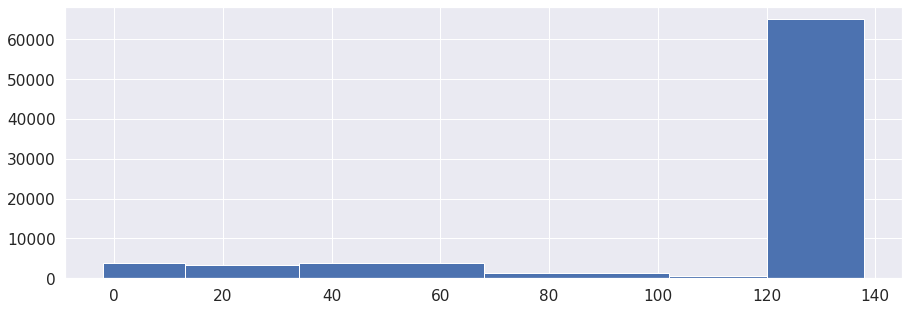

In [45]:
#ASSIGN_DAYS HISTOGRAM
import matplotlib.pyplot as plt
import numpy as np

#leaddata is the original data 

x=np.array(leaddata['assign_days'])
binsX=np.array([-2,13,34,68,102,120,138])

print("ans=\n",np.histogram(x,binsX))

plt.hist(x,bins=binsX)
plt.show()

ans=
 (array([ 754,   90,   56,   30,  192,   15,   22,   11,    9, 1803]), array([  0. ,  13.8,  27.6,  41.4,  55.2,  69. ,  82.8,  96.6, 110.4,
       124.2, 138. ]))


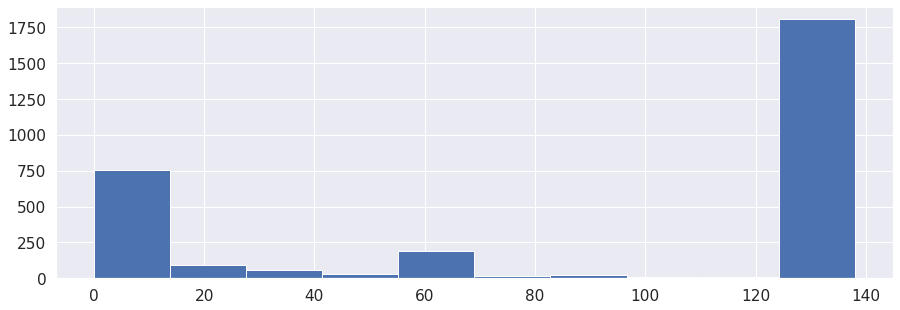

In [46]:
#ASSIGN_DAYS HISTOGRAM,when data is clean.
import matplotlib.pyplot as plt
import numpy as np

#sublead4 ,is data cleaned.

x=np.array(subsetlead4['assign_days'])
print("ans=\n",np.histogram(x))

plt.hist(x)
plt.show()

ans=
 (array([1041,  716,  370,  288,  181,  126,  133,   60,   30,   37]), array([1.20000e+04, 8.19640e+06, 1.63808e+07, 2.45652e+07, 3.27496e+07,
       4.09340e+07, 4.91184e+07, 5.73028e+07, 6.54872e+07, 7.36716e+07,
       8.18560e+07]))


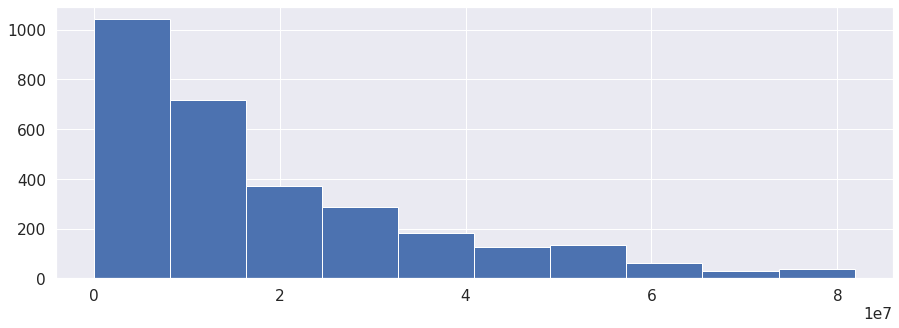

In [47]:
#Revenue HISTOGRAM
import matplotlib.pyplot as plt
import numpy as np

#sublead4 ,is data cleaned.

x=np.array(subsetlead4['revenue'])
print("ans=\n",np.histogram(x))

plt.hist(x)
plt.show()

In [53]:
#Question 5:(Bonus)
#Evaluating assigned variable by using assign days and age in a logistic regression model.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

leaddata8 = pd.read_csv('PS_Homework_data_set.csv')
#Droping Na values 
leaddata8=leaddata8.dropna(subset = ['revenue'])
leaddata8['revenue'].apply(lambda x: '%.17f' % x).values.tolist()

x_data =leaddata8[['assign_days','age']]
y_data =leaddata8['assigned']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)
model = LogisticRegression()
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       535
           1       0.95      0.65      0.77       467

    accuracy                           0.82      1002
   macro avg       0.85      0.81      0.81      1002
weighted avg       0.85      0.82      0.81      1002



[[518  17]
 [165 302]]
Accuracy:  0.8183632734530938


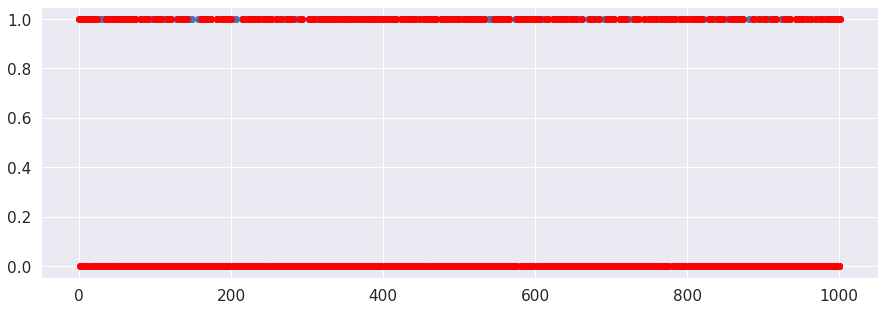

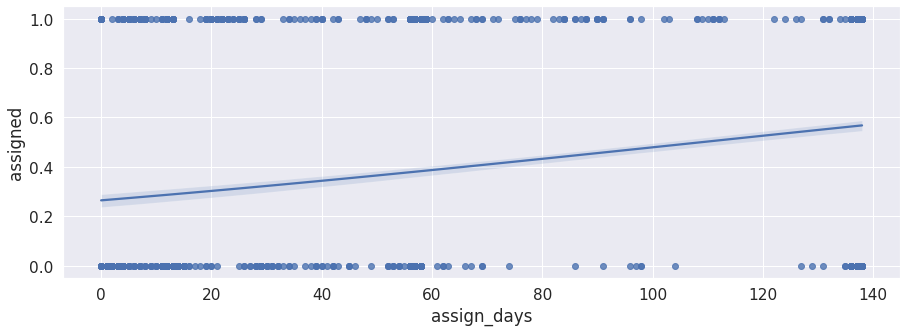

In [54]:
#Ploting the linear regression for assign days vs. assigned.
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
print(confusion_matrix(y_test_data,predictions))
print('Accuracy: ',metrics.accuracy_score(y_test_data, predictions))
plt.clf()
x_test_data=np.arange(0,len(x_test_data),1)
plt.scatter(x_test_data,y_test_data)
plt.scatter(x_test_data, predictions, c="red")
plt.show()
sns.regplot(x='assign_days', y='assigned', data=leaddata8, logistic=True)



[[518  17]
 [165 302]]
Accuracy:  0.8183632734530938


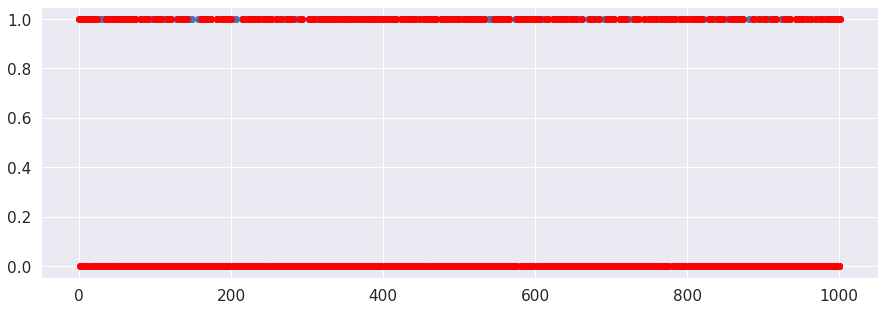

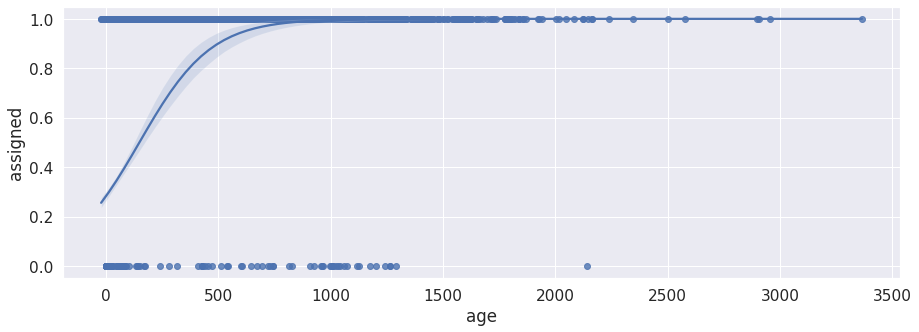

In [55]:
##Ploting the linear regression for age days vs. assigned.
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print(confusion_matrix(y_test_data,predictions))
print('Accuracy: ',metrics.accuracy_score(y_test_data, predictions))

plt.clf()
x_test_data=np.arange(0,len(x_test_data),1)

plt.scatter(x_test_data,y_test_data)
plt.scatter(x_test_data, predictions, c="red")
plt.show()
sns.regplot(x='age', y='assigned', data=leaddata8, logistic=True)

In [50]:
#Evaluation of Logistic Regression
import statsmodels.formula.api as smf
import seaborn as sns

model= smf.logit(formula="assigned~ assign_days + age ", data= leaddata8).fit()
model.summary()

#Interpretation:
#For every one unit increase in assign_days, the log odds of a lead being assigned to a sales representative increase by 0.0052
#And ,for every one unit increase in age, the log odds of a lead being assigned to a sales representative increase by 0.0060.

Optimization terminated successfully.
         Current function value: 0.487203
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               assigned   No. Observations:                 3340
Model:                          Logit   Df Residuals:                     3337
Method:                           MLE   Df Model:                            2
Date:                Fri, 12 Nov 2021   Pseudo R-squ.:                  0.2951
Time:                        04:05:09   Log-Likelihood:                -1627.3
converged:                       True   LL-Null:                       -2308.5
Covariance Type:            nonrobust   LLR p-value:                1.376e-296
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.3867      0.082    -16.882      0.000      -1.548      -1.226
assign_days     0.0052      0.001      7.023      0.000       0.004       0.007
age             0.0060      0.000     19.130      0.000       0.005       0.007
===============================================================================
"""

In [51]:
#Converting the coefficients of the logistic regression model into odd ratios.Getting the exponent of the coefficient value.
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
model_odds

#All the IV's have a significant effect on the log odds of being admitted as indicated by the z values < 0.05.
#assign_days has a z-value 2.16x10-12 and age 1.43x10-81 which are less than 0.05, that is why it is admited.

#Once the log coefficients were converted to odds ratios OR, we say:
#For every one unit increase in assign_days, the log odds of a lead being assigned to a sales representative increases by a factor of  1.00519.
#And ,for every one unit increase in age, the log odds of a lead being assigned to a sales representative increases by a factor of  1.0060.

,OR,z-value,2.5%,97.5%
Intercept,0.249896,6.149675e-64,0.212735,0.293548
assign_days,1.005196,2.164638e-12,1.003743,1.006651
age,1.006019,1.434206e-81,1.005400,1.006637


Accuracy:  0.8183632734530938


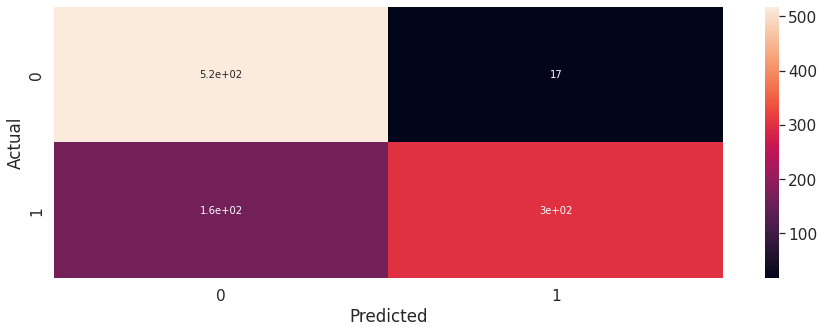

In [56]:
#Performance Evaluation with Confussion matrix
import seaborn as sn
from sklearn import metrics

#Confussion Matrix
confusion_matrix = pd.crosstab(y_test_data,predictions, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test_data, predictions))
plt.show()

In [66]:
#SVM with RBF kernel 
#Convert from 2D to 3D to check the pattern
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from sklearn.svm import SVC
leaddata8 = pd.read_csv('PS_Homework_data_set.csv')
#Droping Na values for revenue-Influence the performance of the model,although is not an independant variable for the model.
leaddata8=leaddata8.dropna(subset = ['revenue'])
leaddata8['revenue'].apply(lambda x: '%.17f' % x).values.tolist()
x_data =leaddata8[['age','assign_days']]
y_data =leaddata8['assigned']
#Training and testing data 
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.25,random_state=0)
## Initialize SVM classifier
svclassifier = SVC(kernel='rbf',C = 0.1, gamma = 0.1)
#Fit data
svclassifier.fit(X_train, y_train)
clf=svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Precision is how certain you are of your true positives. Recall is how certain you are that you are not missing any positives.
#Accuracy value of 87% means that identification of 1 of every 10 assignation to a sales representative is incorrect, and 9 are correct.
#347 assigned values are true positive which means that predicted values are correctly predicted as actual positive

[[376  36]
 [ 76 347]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       412
           1       0.91      0.82      0.86       423

    accuracy                           0.87       835
   macro avg       0.87      0.87      0.87       835
weighted avg       0.87      0.87      0.87       835



In [67]:
# Get support vector indices
support_vector_indices = clf.support_
print(support_vector_indices)

# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

# Get support vectors themselves
support_vectors = clf.support_vectors_



[  20   21   36 ... 2497 2499 2500]
[432 902]


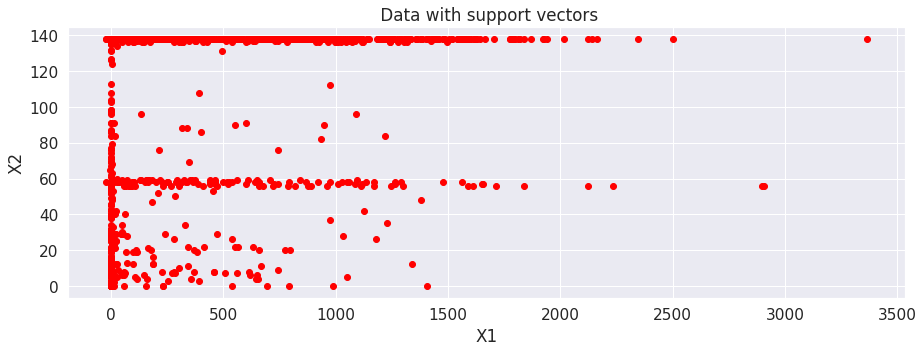

In [68]:
# Visualize support vectors
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title(' Data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [69]:
 #Getting Accuracy
 from sklearn import metrics
 accuracy = metrics.accuracy_score(y_test, y_pred)
 accuracy 


0.8658682634730539

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



[[376  36]
 [ 76 347]]


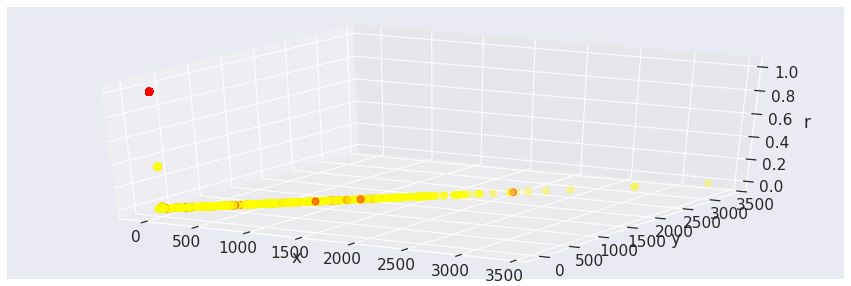

In [70]:
#Trying linear svm on non-linear separable data on a 3D dimension.
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d

ax = plt.gca()
X=X_train.iloc[:,:1].values
y=y_train

#setting the 3rd dimension with RBF centered on the middle clump
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')

#X = leaddata8.iloc[:,:1].values

ax.scatter3D(X[:, 0], X[:, -1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

#from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))


In [71]:
 #Accuracy
 from sklearn import metrics
 accuracy = metrics.accuracy_score(y_test, y_pred)
 accuracy 


0.8658682634730539

In [72]:
#Evaluation performance of SVM with RBF Kernell model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       412
           1       0.91      0.82      0.86       423

    accuracy                           0.87       835
   macro avg       0.87      0.87      0.87       835
weighted avg       0.87      0.87      0.87       835



Accuracy:  0.8658682634730539


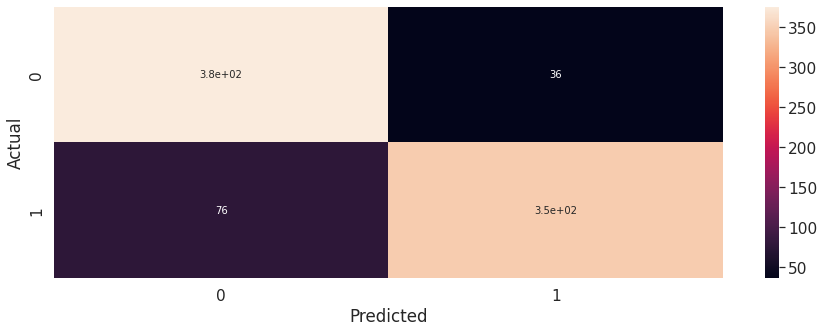

In [73]:
#Confussion Matrix evaluation for SVM with RBF Kernell model
import seaborn as sn
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()